# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

## Imports
All the imports are defined here

In [1]:
%matplotlib inline

import torch
import numpy as np
from torch import optim
import torchvision.utils
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,random_split

import config
from utils import imshow
from models import SiameseNetwork
from training import trainSiamese,inferenceSiamese
from datasets import SiameseNetworkDataset
from loss_functions import ContrastiveLoss

# generate_csv(config.training_dir)

import os
if not os.path.exists('state_dict'):
    os.makedirs('state_dict')

## Using Image Folder Dataset

In [2]:
siamese_dataset = SiameseNetworkDataset(training_dir=config.training_dir,
                                        training_csv=config.training_csv,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

## Visualising some of the data
The top row and the bottom row of any column is one pair. The 0s and 1s correspond to the column of the image.
1 indiciates dissimilar, and 0 indicates similar.

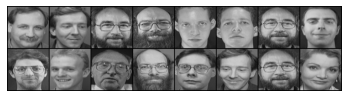

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [3]:
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=1,
                        batch_size=8)

dataiter = iter(vis_dataloader)

example_batch = next(dataiter)

concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

## Training Time!

In [4]:
# Split the dataset into train, validation and test sets
num_train = round(0.8*siamese_dataset.__len__())
num_validate = round(0.1*siamese_dataset.__len__())
num_test = siamese_dataset.__len__()-num_train-num_validate
siamese_train, siamese_valid, siamese_test = random_split(siamese_dataset, [num_train,num_validate,num_test])
train_dataloader = DataLoader(siamese_train,
                        shuffle=True,
                        num_workers=8,
                        batch_size=config.train_batch_size)
valid_dataloader = DataLoader(siamese_valid,
                        shuffle=True,
                        num_workers=8,
                        batch_size=1)

In [5]:
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005 )

Epoch  0  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 26.43it/s]


Epoch  0  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 237.11it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:2.58	 min:0.16	 mean:0.64	 median 0.59
-1 features max:3.39	 min:0.44	 mean:1.85	 median 1.84
Epoch-0	 Train loss: 0.4106	 Valid loss: 0.4002	 Valid error: 0.0627
Epoch  1  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.73it/s]


Epoch  1  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 234.46it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.28	 min:0.17	 mean:0.52	 median 0.47
-1 features max:4.72	 min:0.42	 mean:2.25	 median 2.14
Epoch-1	 Train loss: 0.0492	 Valid loss: 0.2373	 Valid error: 0.0399
new model saved
Epoch  2  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.56it/s]


Epoch  2  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 230.37it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.10	 min:0.09	 mean:0.39	 median 0.36
-1 features max:4.83	 min:0.38	 mean:2.35	 median 2.32
Epoch-2	 Train loss: 0.0379	 Valid loss: 0.1616	 Valid error: 0.0142
new model saved
Epoch  3  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.65it/s]


Epoch  3  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 236.57it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.98	 min:0.04	 mean:0.39	 median 0.35
-1 features max:5.53	 min:0.48	 mean:2.86	 median 2.89
Epoch-3	 Train loss: 0.0764	 Valid loss: 0.1249	 Valid error: 0.0085
new model saved
Epoch  4  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.36it/s]


Epoch  4  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 242.93it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.91	 min:0.05	 mean:0.35	 median 0.29
-1 features max:5.47	 min:0.46	 mean:2.90	 median 2.90
Epoch-4	 Train loss: 0.1924	 Valid loss: 0.1029	 Valid error: 0.0028
new model saved
Epoch  5  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 32.04it/s]


Epoch  5  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 232.66it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.81	 min:0.06	 mean:0.34	 median 0.31
-1 features max:5.37	 min:0.92	 mean:2.91	 median 2.93
Epoch-5	 Train loss: 0.0290	 Valid loss: 0.0900	 Valid error: 0.0000
new model saved
Epoch  6  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.62it/s]


Epoch  6  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 234.54it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.83	 min:0.03	 mean:0.32	 median 0.28
-1 features max:5.42	 min:0.84	 mean:2.96	 median 2.96
Epoch-6	 Train loss: 0.0175	 Valid loss: 0.0837	 Valid error: 0.0000
Epoch  7  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.54it/s]


Epoch  7  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 229.32it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.85	 min:0.05	 mean:0.31	 median 0.27
-1 features max:5.64	 min:0.84	 mean:3.07	 median 3.20
Epoch-7	 Train loss: 0.0181	 Valid loss: 0.0818	 Valid error: 0.0057
Epoch  8  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.32it/s]


Epoch  8  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 225.27it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.12	 min:0.05	 mean:0.30	 median 0.26
-1 features max:5.19	 min:1.00	 mean:2.96	 median 3.03
Epoch-8	 Train loss: 0.0217	 Valid loss: 0.0740	 Valid error: 0.0028
Epoch  9  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.58it/s]


Epoch  9  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 228.61it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.85	 min:0.05	 mean:0.29	 median 0.25
-1 features max:5.74	 min:0.95	 mean:3.05	 median 3.08
Epoch-9	 Train loss: 0.0000	 Valid loss: 0.0699	 Valid error: 0.0000
Epoch  10  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.38it/s]


Epoch  10  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 234.00it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.87	 min:0.06	 mean:0.27	 median 0.23
-1 features max:5.77	 min:1.08	 mean:3.08	 median 3.14
Epoch-10	 Train loss: 0.0102	 Valid loss: 0.0619	 Valid error: 0.0000
Epoch  11  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.60it/s]


Epoch  11  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 234.97it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.78	 min:0.03	 mean:0.26	 median 0.23
-1 features max:5.75	 min:1.08	 mean:3.04	 median 3.07
Epoch-11	 Train loss: 0.0251	 Valid loss: 0.0609	 Valid error: 0.0000
Epoch  12  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.19it/s]


Epoch  12  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 233.67it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.98	 min:0.05	 mean:0.30	 median 0.26
-1 features max:5.65	 min:1.13	 mean:3.09	 median 3.08
Epoch-12	 Train loss: 0.0169	 Valid loss: 0.0720	 Valid error: 0.0000
Epoch  13  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.46it/s]


Epoch  13  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 232.25it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.96	 min:0.05	 mean:0.28	 median 0.23
-1 features max:5.49	 min:1.08	 mean:2.97	 median 3.00
Epoch-13	 Train loss: 0.0303	 Valid loss: 0.0677	 Valid error: 0.0000
Epoch  14  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.46it/s]


Epoch  14  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 235.04it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.89	 min:0.04	 mean:0.28	 median 0.23
-1 features max:5.91	 min:1.11	 mean:3.08	 median 3.12
Epoch-14	 Train loss: 0.0297	 Valid loss: 0.0670	 Valid error: 0.0000
Epoch  15  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.66it/s]


Epoch  15  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 237.38it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.04	 min:0.03	 mean:0.25	 median 0.22
-1 features max:5.28	 min:0.95	 mean:2.87	 median 2.96
Epoch-15	 Train loss: 0.0210	 Valid loss: 0.0697	 Valid error: 0.0028
Epoch  16  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.76it/s]


Epoch  16  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 226.72it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.87	 min:0.05	 mean:0.26	 median 0.23
-1 features max:5.13	 min:0.80	 mean:2.98	 median 3.02
Epoch-16	 Train loss: 0.0145	 Valid loss: 0.0651	 Valid error: 0.0028
Epoch  17  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.83it/s]


Epoch  17  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 246.33it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.88	 min:0.03	 mean:0.24	 median 0.20
-1 features max:5.83	 min:0.85	 mean:3.05	 median 3.09
Epoch-17	 Train loss: 0.0308	 Valid loss: 0.0561	 Valid error: 0.0028
Epoch  18  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.65it/s]


Epoch  18  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 227.06it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.91	 min:0.03	 mean:0.25	 median 0.20
-1 features max:5.57	 min:0.78	 mean:3.00	 median 3.03
Epoch-18	 Train loss: 0.0076	 Valid loss: 0.0622	 Valid error: 0.0028
Epoch  19  training


100%|███████████████████████████████████████████| 71/71 [00:02<00:00, 31.66it/s]


Epoch  19  validating


100%|████████████████████████████████████████| 351/351 [00:01<00:00, 232.92it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.13	 min:0.03	 mean:0.25	 median 0.20
-1 features max:6.03	 min:1.16	 mean:3.23	 median 3.28
Epoch-19	 Train loss: 0.0168	 Valid loss: 0.0592	 Valid error: 0.0000


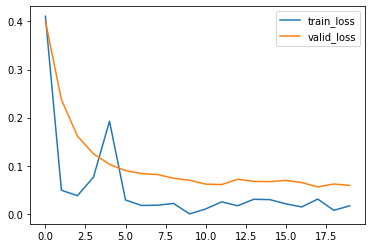

In [6]:
net, train_loss_history, valid_loss_history,dict_name = trainSiamese(net,criterion,optimizer,train_dataloader,
             valid_dataloader,config.train_number_epochs,do_show=True)

## Testing

100%|████████████████████████████████████████| 351/351 [00:01<00:00, 259.20it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.87	 min:0.06	 mean:0.26	 median 0.23
-1 features max:6.07	 min:1.05	 mean:3.29	 median 3.26
Test loss: 0.0485	 Test error: 0.0000


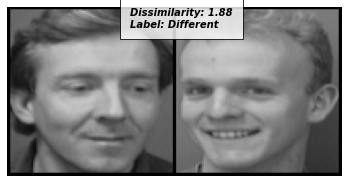

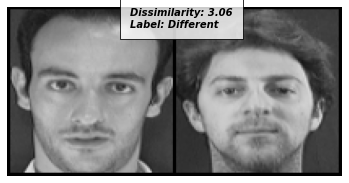

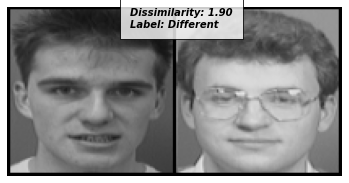

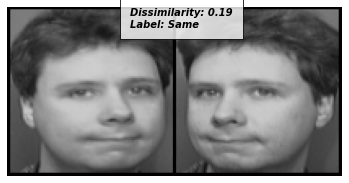

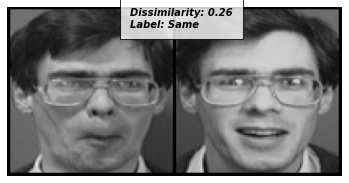

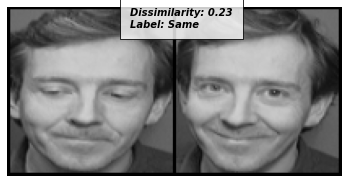

In [8]:
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load(os.path.join("state_dict",dict_name)))
net.eval()

test_dataloader = DataLoader(siamese_test,num_workers=8,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)

test_loss, test_er = inferenceSiamese(net,criterion,test_dataloader)
print("Test loss: %.4f\t Test error: %.4f"
      %(test_loss, test_er))


for i in range(3):
    label = 0
    while label == 0:
        x0,x1,label = next(dataiter)
        label = label.detach().cpu().numpy()[0][0]

    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}\nLabel: {}'.format(euclidean_distance.item(),'Different'))

for i in range(3):
    label = 1
    while label == 1:
        x0,x1,label = next(dataiter)
        label = label.detach().cpu().numpy()[0][0]

    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}\nLabel: {}'.format(euclidean_distance.item(),'Same'))

